# Prediction using normal score for Wall Street Columns
In this notebook we extract we compare how the good are the features when we allow some mix in time and when we compell them to be independent. We use this features to make a simple prediction tasks where each example has to predict its own letter and use the prediction as a means of comparison for the quality of the features.

In [1]:
import numpy as np
from sklearn import svm, cross_validation
import h5py

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append("../")

/home/heberto/miniconda/envs/nexa/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## With Spaces

#### Load the features

In [2]:
# Data to use
Ndata = 10000

# First we load the file 
file_location = '../results_database/text_wall_street_columns.hdf5'


# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

targets = []

for index in range(Ndata):
    letter_index = index // 10
    targets.append(letters_sequence[letter_index])

# Transform to array
targets = np.array(targets)

#### Do the loop and calculate the scores

In [3]:
# Calculate the predictions    
Ntime_clusters_set = np.arange(3, 50, 3)   

scores_mixed = []
scores_indp = []

# Nexa parameters
Nspatial_clusters = 3
Nembedding = 3

In [4]:
for Ntime_clusters in Ntime_clusters_set:
    print(Ntime_clusters)
    # Here calculate the scores for the mixes
    run_name = '/test'
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = svm.SVC(C=1.0, kernel='linear')
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep'
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = svm.SVC(C=1.0, kernel='linear')
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp.append(score)

3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48


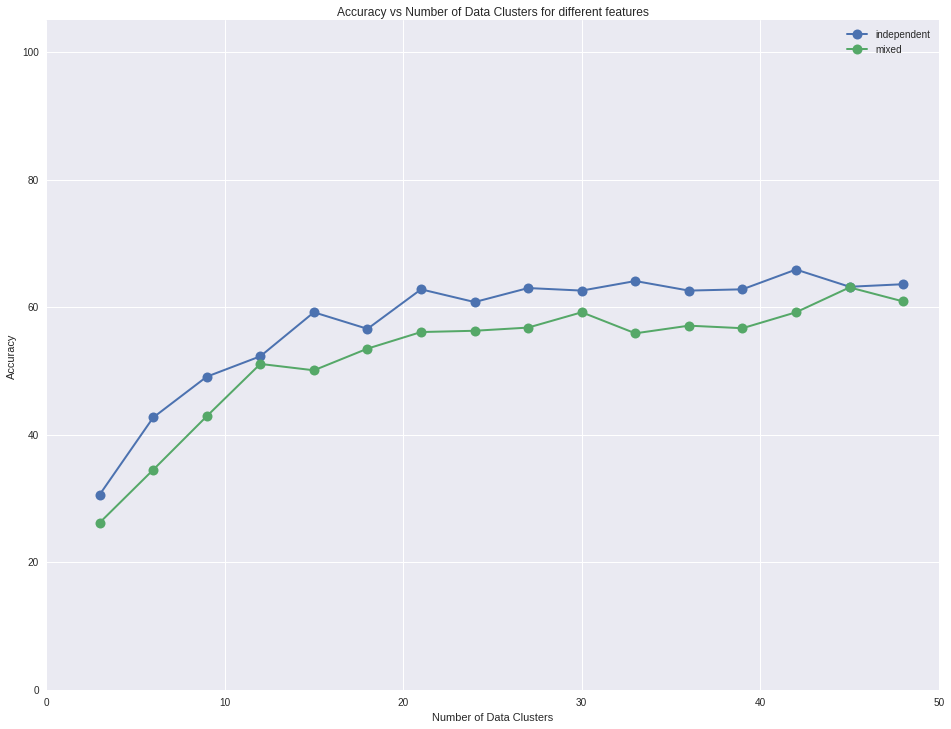

In [5]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Ntime_clusters_set, scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(Ntime_clusters_set, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Data Clusters')
ax.set_title('Accuracy vs Number of Data Clusters for different features')
ax.legend()

## Now without spaces

#### Load the features

In [6]:
# Data to use
Ndata = 10000

# First we load the file 
file_location = '../results_database/text_wall_street_columns.hdf5'


# Now we need to get the letters and align them
text_directory = '../data/wall_street_letters.npy'
letters_sequence = np.load(text_directory)
Nletters = len(letters_sequence)
symbols = set(letters_sequence)

targets = []

for index in range(Ndata):
    letter_index = index // 10
    targets.append(letters_sequence[letter_index])

# Transform to array
targets = np.array(targets)

#### Do the loop and calculate the scores

In [7]:
# Calculate the predictions    
Ntime_clusters_set = np.arange(3, 50, 3)   

scores_mixed_wspaces = []
scores_indp_wspaces = []

# Nexa parameters
Nspatial_clusters = 3
Nembedding = 3

In [8]:
for Ntime_clusters in Ntime_clusters_set:
    print(Ntime_clusters)
    # Here calculate the scores for the mixes
    run_name = '/test'
    f = h5py.File(file_location, 'r')

    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = svm.SVC(C=1.0, kernel='linear')
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_mixed_wspaces.append(score)

    # Here calculate the scores for the independent
    run_name = '/indep'
    f = h5py.File(file_location, 'r')
    
    parameters_string = '/' + str(Nspatial_clusters)
    parameters_string += '-' + str(Ntime_clusters)
    parameters_string += '-' + str(Nembedding)

    nexa = f[run_name + parameters_string]
    cluster_to_index = nexa['cluster_to_index']
    code_vectors_softmax = np.array(nexa['code-vectors-softmax'])

    # Now we need to classify
    X  = code_vectors_softmax[:Ndata]
    y = targets
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.10)

    clf_linear = svm.SVC(C=1.0, kernel='linear')
    clf_linear.fit(X_train, y_train)
    score = clf_linear.score(X_test, y_test) * 100.0
    scores_indp_wspaces.append(score)

3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48


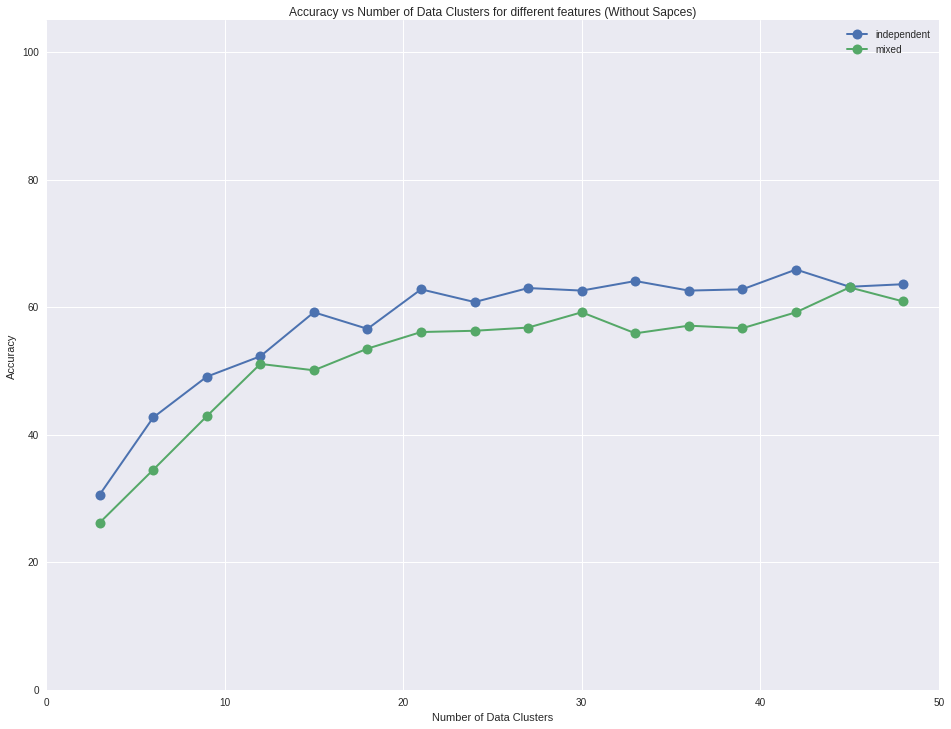

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Ntime_clusters_set, scores_indp, 'o-', label='independent', lw=2, markersize=10)
ax.plot(Ntime_clusters_set, scores_mixed, 'o-', label='mixed', lw=2, markersize=10)

ax.set_ylim(0, 105)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Data Clusters')
ax.set_title('Accuracy vs Number of Data Clusters for different features (Without Sapces)')
ax.legend()